TOPSIS for Pre-trained Models - Assignment 05

submitted by:

Yatin Arora
[102303935]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


Defining Data

We compare 5 pre-trained models on 4 criteria:

Accuracy: Higher is better

Inference Time (ms): Lower is better

Model Size (MB): Lower is better

F1 Score: Higher is better

In [ ]:
data = {
    'Model': ['BERT-Base', 'RoBERTa-Base', 'DistilBERT', 'XLNet', 'MobileBERT'],
    'Accuracy': [0.92, 0.94, 0.89, 0.93, 0.88],
    'Inference_Time_ms': [150, 160, 90, 180, 50],
    'Model_Size_MB': [440, 500, 260, 550, 100],
    'F1_Score': [0.91, 0.93, 0.88, 0.92, 0.87]
}

df = pd.DataFrame(data)

In [ ]:
weights = np.array([0.3, 0.2, 0.2, 0.3])
impacts = ['+', '-', '-', '+']

X = df.iloc[:, 1:].values
m, n = X.shape

norm_X = X / np.sqrt((X**2).sum(axis=0))

weighted_X = norm_X * weights

ideal_best = []
ideal_worst = []

for i in range(n):
    if impacts[i] == '+':
        ideal_best.append(max(weighted_X[:, i]))
        ideal_worst.append(min(weighted_X[:, i]))
    else:
        ideal_best.append(min(weighted_X[:, i]))
        ideal_worst.append(max(weighted_X[:, i]))

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

S_plus = np.sqrt(((weighted_X - ideal_best)**2).sum(axis=1))
S_minus = np.sqrt(((weighted_X - ideal_worst)**2).sum(axis=1))

scores = S_minus / (S_plus + S_minus)

df['Topsis Score'] = scores
df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)

In [ ]:
output_csv = 'topsis_results.csv'
df.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")
print(df)

Results saved to topsis_results.csv
          Model  Accuracy  Inference_Time_ms  Model_Size_MB  F1_Score  \
0     BERT-Base      0.92                150            440      0.91   
1  RoBERTa-Base      0.94                160            500      0.93   
2    DistilBERT      0.89                 90            260      0.88   
3         XLNet      0.93                180            550      0.92   
4    MobileBERT      0.88                 50            100      0.87   

   Topsis Score  Rank  
0      0.244772     3  
1      0.157104     4  
2      0.658558     2  
3      0.073728     5  
4      0.912802     1  


Plot saved to topsis_rank_plot.png


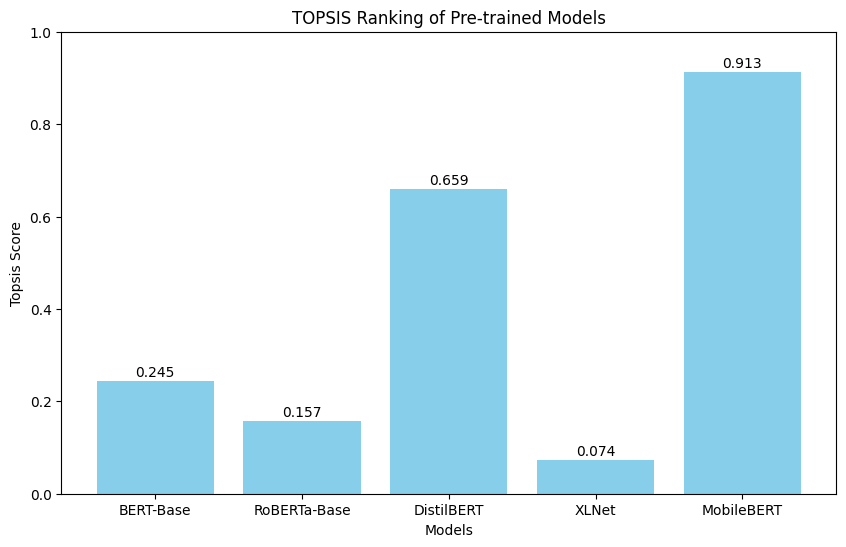

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Topsis Score'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Topsis Score')
plt.title('TOPSIS Ranking of Pre-trained Models')
plt.ylim(0, 1)
for i, v in enumerate(df['Topsis Score']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

output_plot = 'topsis_rank_plot.png'
plt.savefig(output_plot)
print(f"Plot saved to {output_plot}")
